# Fonction résultant

In [16]:
def résultant(P,Q): #on applique l'agorithme efficace du cours
    m=P.degree()
    n=Q.degree()
    R=P%Q
    r=R.degree()
    if R==0:
        return 0
    if r==0:
        return (-1)^(n*m)*(Q[n]^(m-r))*R^n
    return  ((-1)^(n*m))*(Q[n]^(m-r))*résultant(Q,R)

In [2]:
A.<x>=QQ[]
P=x^3+x+1
Q=x^4+x^2-2

In [3]:
P.resultant(Q)

-9

In [4]:
résultant(P,Q)

-9

# Une courbe paramétrée

In [5]:
X=x^3+x^2
Y=x-x^3

In [6]:
diff(X),diff(Y) #ne s'annulent pas simultanément

(3*x^2 + 2*x, -3*x^2 + 1)

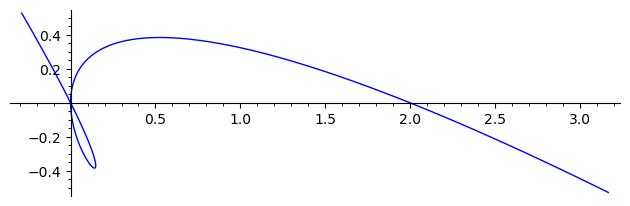

In [7]:
reset()
parametric_plot((x^3+x^2,x-x^3),(-1.2,1.2))

In [8]:
def p():
    return(parametric_plot((x^3+x^2,x-x^3),(-1.2,1.2)))

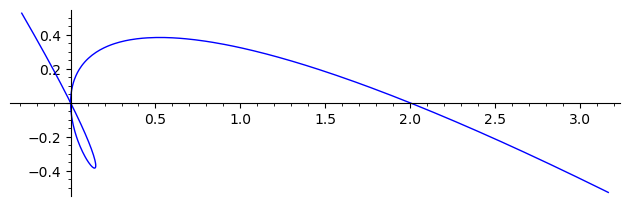

In [9]:
p()

In [18]:
A.<x,y>=ZZ[]
B.<t>=A[]

In [19]:
P=t^3+t^2-x
Q=t-t^3-y

In [20]:
P.resultant(Q)

-x^3 - 3*x^2*y - 3*x*y^2 - y^3 + 2*x^2 + x*y

In [21]:
résultant(P,Q) #ne fonctionne pas car l'algo efficace du cours ne fonctionne que sur un corps! Ici il faudrait coder le résultant via le déterminant de la matrice de Sylvester ou utiliser la commande de Sage

ArithmeticError: division non exact (consider coercing to polynomials over the fraction field)

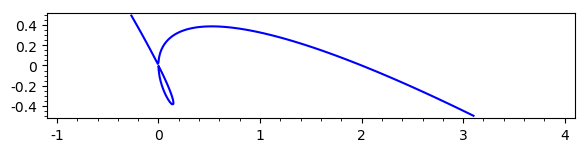

In [110]:
implicit_plot(-x^3 - 3*x^2*y - 3*x*y^2 - y^3 + 2*x^2 + x*y,(-1,4),(-0.5,0.5),plot_points=500)

# Intersection de courbes planes

In [5]:
def intersection(P,Q): #si P et Q n'ont pas de facteur en commun
    R=P.resultant(Q,y)
    S=R.polynomial(x).roots(CC)
    S=[S[i][0] for i in range(len(S))]
    Sol=[]
    for i in S:
        Pi=P.substitute(x=i)
        Qi=Q.substitute(x=i)
        g=gcd(Pi,Qi)
        K=g.polynomial(y).roots()
        K=[K[i][0] for i in range(len(K))]
        for j in K:
            Sol.append((i,j))
    return Sol

In [6]:
x,y=var('x,y')
P=y^2-x^3-2*x-1
Q=(x-3)^2+(y-11)^2-13^2

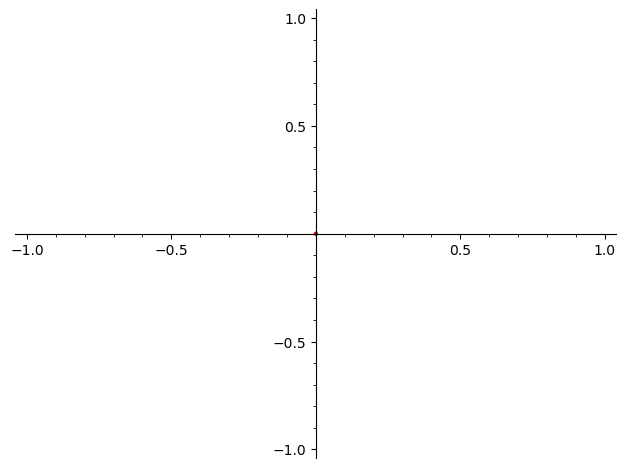

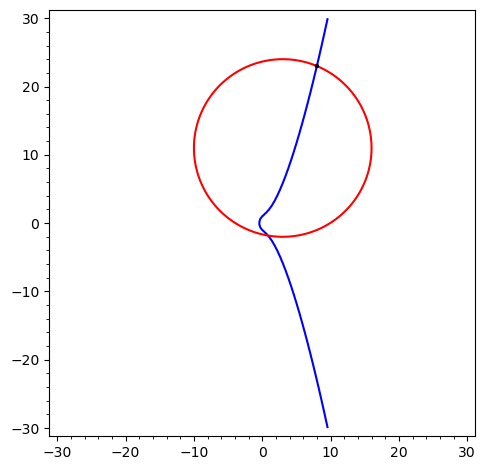

In [29]:
a=implicit_plot(P,(-30,30),(-30,30),zorder=2)
b=implicit_plot(Q,(-30,30),(-30,30),color='red',zorder=1)
c=point((8,23),color='black',zorder=10)
a+b+c

In [25]:
A.<x,y>=CC[]
P=y^2-x^3-2*x-1
Q=(x-3)^2+(y-11)^2-13^2
intersection(P,Q)

[(0.850516887497095, -1.82106556995419),
 (8.00000000000000, 23.0000000000000),
 (-0.466449425319549 - 1.33038638825557*I,
  -1.60505896930851 + 0.365862400346585*I),
 (-0.466449425319549 + 1.33038638825557*I,
  -1.60505896930851 - 0.365862400346585*I)]

In [4]:
?.roots()

Object `.roots()` not found.


In [212]:
(-1.82106556995419)^2-(0.850516887497095^3+2*0.850516887497095+1),(0.850516887497095-3)^2+(-1.82106556995419-11)^2-13^2

(-8.43769498715119e-15, -8.52651282912120e-14)

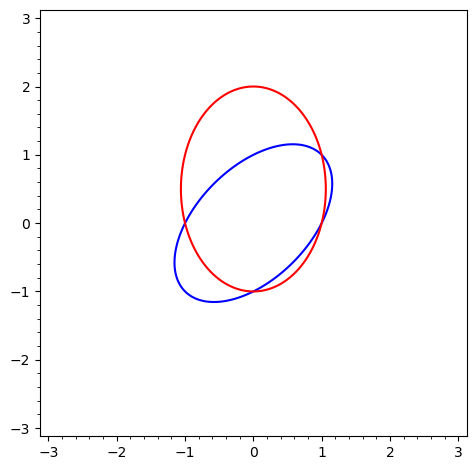

In [26]:
x,y=var('x,y')
P=x^2-x*y+y^2-1
Q=2*x^2+y^2-y-2
a=implicit_plot(P,(-3,3),(-3,3))
b=implicit_plot(Q,(-3,3),(-3,3),color='red')
a+b

In [27]:
A.<x,y>=CC[]
P=x^2-x*y+y^2-1
Q=2*x^2+y^2-y-2
intersection(P,Q)

[(-1.00000000000000, 0),
 (0.000000000000000, -1.00000000000000),
 (1.00000000000000, 1.00000000000000),
 (1.00000000000000, 0)]

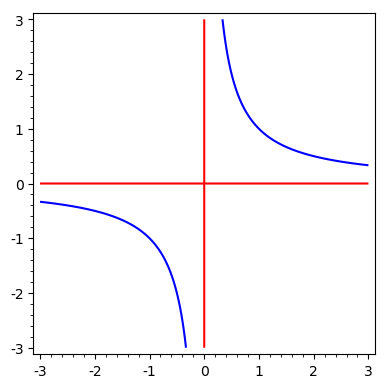

In [217]:
x,y=var('x,y')
P=x*y-1
Q=x*y
a=implicit_plot(P,(-3,3),(-3,3))
b=implicit_plot(Q,(-3,3),(-3,3),color='red')
a+b

In [218]:
A.<x,y>=CC[]
P=x*y-1
Q=x*y
intersection(P,Q)

[]

# Polynôme minimal

In [222]:
A.<x,y>=QQ[]
P=y^2-2
Q=x^2-3
R=P.resultant(Q.substitute(x=x+y),y) #qui est bien le polynôme minimal car sqrt(2)+sqrt(3) engendre une extension de degré 4 

In [230]:
R,R.polynomial(x).is_irreducible()

(x^4 - 10*x^2 + 1, True)

In [238]:
A.<x,y>=QQ[]
P=y^2-3
Q=x^3-2
R=P.resultant(A(y^(Q.polynomial(x).degree())*Q.substitute(x=x/y)),y) # idem car on a une extension de degré 6

In [239]:
R

x^6 - 108

In [241]:
factor(108),R.polynomial(x).is_irreducible()

(2^2 * 3^3, True)

In [301]:
reset()
def irred_poly(n): #on peut utiliser par exemple le critère d'eisenstein
    P=X^n
    for i in range(1,n):
        P=P+3*ZZ.random_element()*X**i
    return P+3

In [244]:
irred_poly(10)

X^10 + 3*X^9 - 108*X^8 + 6*X^7 - 3*X^5 - 3*X^3 - 3*X^2 + 9*X + 3

In [302]:
A.<X>=QQ[]
P=irred_poly(6)
P

X^6 + 3*X^5 + 3*X^3 + 3*X^2 + 105*X + 3

In [303]:
K.<x>=A.quotient(P)
R.<U>=K[]

In [411]:
H=sum(QQ.random_element()*X^i for i in range(5))
H

1/8*X^4 - 2*X^3 - 5/6*X^2 - 7*X

In [412]:
a=R(H).substitute(U=x)
a

1/8*x^4 - 2*x^3 - 5/6*x^2 - 7*x

In [413]:
a.minpoly()

x^6 - 789/8*x^5 - 26111/6*x^4 - 786508597/4608*x^3 - 60221260415/12288*x^2 - 51960226063817/884736*x + 252987560109877/21233664

In [414]:
F.<r,s>=QQ[]

In [425]:
P.substitute(X=r).resultant(s-H.substitute(X=r),r) #ici on a égalité

s^6 - 789/8*s^5 - 26111/6*s^4 - 786508597/4608*s^3 - 60221260415/12288*s^2 - 51960226063817/884736*s + 252987560109877/21233664

In [424]:
typ(H.substitute(X=r).polynomial(r))

<class 'sage.rings.polynomial.polynomial_element.Polynomial_generic_dense'>

In [426]:
A.<X>=QQ[]
P=X^4-2

In [427]:
K.<x>=A.quotient(P)
R.<U>=K[]

In [428]:
H=X^2

In [429]:
a=R(H).substitute(U=x)
a

x^2

In [430]:
a.minpoly()

x^2 - 2

In [432]:
F.<r,s>=QQ[]
factor(P.substitute(X=r).resultant(s-H.substitute(X=r),r)) #ici on n'a pas égalité

(s^2 - 2)^2

# Enveloppe d'une courbe

In [434]:
reset()
A.<x,y,t>=QQ[]
F=x^2+(y-t)^2-(1+t^2)/2
G=diff(F,t)

In [435]:
F,G

(x^2 + y^2 - 2*y*t + 1/2*t^2 - 1/2, -2*y + t)

In [436]:
F.resultant(G,t)

x^2 - y^2 - 1/2

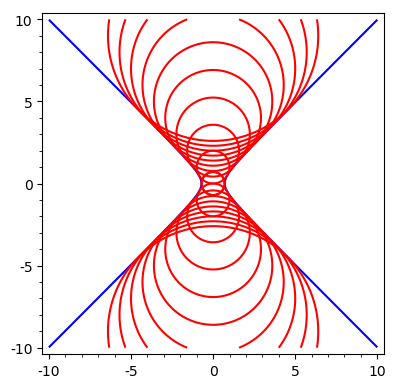

In [441]:
x,y,t=var('x,y,t')
F=x^2+(y-t)^2-(1+t^2)/2
a=implicit_plot(x^2-y^2-1/2,(-10,10),(-10,10))
for i in range(10):
    a=a+implicit_plot(F.substitute(t=i),(-10,10),(-10,10),color='red')
    a=a+implicit_plot(F.substitute(t=-i),(-10,10),(-10,10),color='red')
a

In [442]:
reset()
A.<x,y,t>=QQ[]
F=3*t*x-2*y-t^3
G=diff(F,t)

In [443]:
F.resultant(G,t)

108*x^3 - 108*y^2

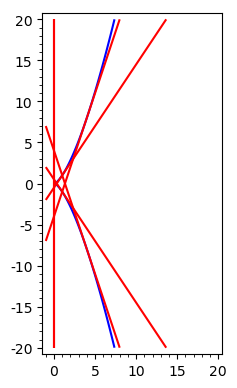

In [455]:
x,y,t=var('x,y,t')
F=3*t*x-2*y-t^3
a=implicit_plot(108*x^3-108*y^2,(-1,20),(-20,20))
for i in range(3):
    a=a+implicit_plot(F.substitute(t=i),(-1,20),(-20,20),color='red')
    a=a+implicit_plot(F.substitute(t=-i),(-1,20),(-20,20),color='red')
a

In [456]:
reset()
A.<x,y,t>=QQ[]
F=-t^2/4-y+t*x
G=diff(F,t)

In [457]:
F.resultant(G,t)

1/4*x^2 - 1/4*y

# Formule de Héron

In [462]:
reset()
A.<x,y,a,b,c,S>=QQ[]
p=(a-x)^2+y^2-b^2
q=x^2+y^2-c^2
r=a*y-2*S

In [464]:
r1=p.resultant(q,x) #élimine x
r1

4*y^2*a^2 + a^4 - 2*a^2*b^2 + b^4 - 2*a^2*c^2 - 2*b^2*c^2 + c^4

In [465]:
r.resultant(r1,y) #élimine y et donne la formule

a^6 - 2*a^4*b^2 + a^2*b^4 - 2*a^4*c^2 - 2*a^2*b^2*c^2 + a^2*c^4 + 16*a^2*S^2

# Méthode de Newton

In [501]:
def newton(f,x,N):
    x0=x
    fp=diff(f)
    err=abs(f(x0))
    while err>10^(-N):
        x0=float(x0-f(x0)/fp(x0))
        err=abs(f(x0))
        print(x0)
    return x0

In [467]:
x=var('x')

In [473]:
f=x^2-2
diff(f)
f(1)

-1

In [484]:
newton(f,1,10),float(sqrt(2))

1.5
1.4166666666666667
1.4142156862745099
1.4142135623746899


/Users/kevin_destagnol/anaconda3/envs/sage/lib/python3.7/site-packages/sage/all_cmdline.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  """


(1.4142135623746899, 1.4142135623730951)

In [485]:
f=sin(x)
diff(f)

cos(x)

In [502]:
newton(f,2,10),float(pi)

4.185039863261519
2.467893674514666
3.266186277569106
3.1409439123176353
3.1415926536808043


/Users/kevin_destagnol/anaconda3/envs/sage/lib/python3.7/site-packages/sage/all_cmdline.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  """


(3.1415926536808043, 3.141592653589793)